# Daftar Isi
> 1. Definisi 
> 2. Tipe Clustering 
> 3. Aplikasi Clustering
> 4. Hands-On Customer Segmentation K-Means & Hierarchical

### 1. Definisi
- Clustering adalah teknik data mining yang berfungsi untuk membagi data menjadi satu kelas / klaster berdasarkan karakteristik  
- Fungsi Clustering adalah mengelompokkan N data menjadi k class berdasarkan tingkat kemiripan melalui perhitungan jarak 
- perhitungan jarak yang dipakai umumnya menggunakan **Euclidean Distance** tapi bisa juga distance yang lainnya
- Clustering masuk dalam kategori **Unsupervised Learning** yang tidak memiliki target
- Clustering merupakan analisis yang **tricky** karena semi subjective

![](clustering.png)

### 2. Tipe Clustering 
**a. Partitional Clustering**: 
- Jenis clustering yang mana satu data hanya boleh masuk dalam satu klaster saja 
- Bersifat flat clustering yang memerlukan input jumlah k diawal sebelum proses clustering dimulai
- Penentuan jumlah klaster yang optimal dapat dilakukan dgn beberapa metode
> Contoh: Dunn Index, Davies Bouldin Index, Silhouette Coefficient, Elbow, dll. 
- Keunggulan: kompleksitas waktu pemrosesan rendah, cepat, cocok untuk big data 
- Kelemahan: inisialisasi centroid yang acak sehingga bisa jadi centroid yang terpilih bukan merupakan titik konvergen
- Algoritma: K-Means, K-Mode, K-Prototype, K-Medoids, dll.

**b. Hierarchical Clustering**: 
- Jenis clustering yang dalam pengelompokkanya didasarkan pada hierarki antar data dan linkage (linkage adalah hubungan/keterkaitan antar data)
- Tidak perlu input jumlah k di awal, algoritmanya sendirilah yang menentukan jumlah klaster dengan melihat visualisasi **dendrogram**
- Keunggulan: mengetahui hierarki antar data yang saling mirip sehingga bisa memahami keterkaitan antar data dengan baik
- Kelemahan: kompleksitas waktu yang tinggi sehingga kurang cocok untuk big data. the more observation we have, the slower it gets
- Algoritma: Agglomerative (Bottom-Up), Divisive (Top-Down)
- Tipe linkage: complete (jarak terjauh), single (jarak terdekat), average (jarak rata-rata), ward (minimal varians)

![](tipeclustering.png)

### 3. Aplikasi Clustering in Kehidupan
**a. Document Clustering**: mengelompokkan artikel berdasarkan kemiripan topic
![](document.webp)

**b. Recommender System:** mengelompokkan lagu berdasarkan daily listening seorang user 
![](spotify.webp)

**c. Customer Segmentation:** mengelompokkan pelanggan berdasarkan karakteristik tertentu (grouping by age, demography, behaviour, etc)

## Hands-On: Customer Segmentation K-Means

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [2]:
# import data 

df = pd.read_csv('Mall_Customers.csv', sep = ',')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# check data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df = df.drop('CustomerID', axis = 1)

In [5]:
# copy data 

mall = df.copy()

In [6]:
# descriptive statistics untuk mengetahui distribusi data

mall.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Pengamantan dari *statistical summary* diatas: 
- distribusi nilai di kolom `age` , `annual income`, dan `spending score` terlihat normal (mean dan median cukup dekat) 

In [7]:
# define category and numeric

nums = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
cat = mall['Gender']

In [8]:
# standardize the data 

scaler = StandardScaler().fit_transform(nums.values)
new_mall = pd.DataFrame(scaler, columns = nums.columns)
new_mall.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [9]:
# encoding categorical data 

pd.get_dummies(cat, prefix = 'Gender')

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


**disclaimer :** 
- kita bisa menganggap bahwa 0 : female , 1 : male 
- ketika gunakan dummies, maka drop salah satu column. karena 1 column sudah bisa merepresentasikan informasi yang dimaksudkan oleh feature gender 

In [10]:
# drop one of dummies

gender = pd.get_dummies(cat, prefix = 'Gender', drop_first = True)
gender.head()

,Gender_Male
0,1
1,1
2,0
3,0
4,0


In [11]:
# join categorial and numerical data

dfmall = new_mall.join(gender)
dfmall.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [12]:
# select the best k for k-means clustering (elbow)

sse = []
for i in range(2,11): 
    km = KMeans(n_clusters = i, 
                init = 'k-means++', 
                max_iter = 100, 
                n_init = 10, 
                random_state = 42)
    y_km = km.fit_predict(dfmall.values)
    inertia = km.inertia_
    sse.append(round(inertia, 2))

- menggunakan for loop dalam rangka mengiterasi fungsi k-means berdasarkan range cluster yang kita definisikan untuk menemukan pada jumlah k berapa yang paling optimal 

In [17]:
print(sse)

[438.52, 344.41, 254.36, 216.78, 181.95, 170.57, 150.61, 138.5, 129.19]


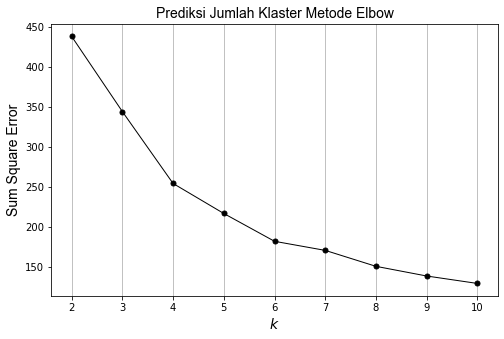

In [18]:
# visualisasi elbow 

plt.figure(figsize = (8,5))

plt.plot(range(2,11), sse, linewidth = 1, color = 'black', marker = 'o', markersize = 5)
plt.title('Prediksi Jumlah Klaster Metode Elbow', family = 'Arial', fontsize = 14, color = 'black')
plt.xlabel('$k$', family = 'Arial', fontsize = 14, color = 'black')
plt.ylabel('Sum Square Error', family = 'Arial', fontsize = 14, color = 'black')

plt.xticks(range(2,11))

plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.3);

In [13]:
km_elbow = KMeans(n_clusters = 6, 
                     init = 'k-means++', 
                     max_iter = 100, 
                     n_init = 10, 
                     random_state = 42)
y_kmelbow = km_elbow.fit_predict(dfmall.values)

In [14]:
# concate dengan dataframe hasil copy tadi, yaitu mall

mall['Cluster'] = y_kmelbow

In [15]:
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3


In [16]:
average = mall.groupby(['Cluster'], as_index = False).mean()
average

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,25.000000,25.260870,77.608696
1,1,56.333333,54.266667,49.066667
2,2,27.000000,56.657895,49.131579
3,3,45.523810,26.285714,19.380952
4,4,41.264706,88.500000,16.764706
5,5,32.692308,86.538462,82.128205


**Visualisasi Data Kategorikal**

In [17]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [33]:
list(enumerate(features))

[(0, 'Age'), (1, 'Annual Income (k$)'), (2, 'Spending Score (1-100)')]

**notes :** 
- melakukan enumerate agar memudahkan iterasi visualisasi
- enumerate adalah fungsi untuk memanggil feature yang kita list dengan menambahkan index, yang dibentuk dalam satu kesatuan tuple

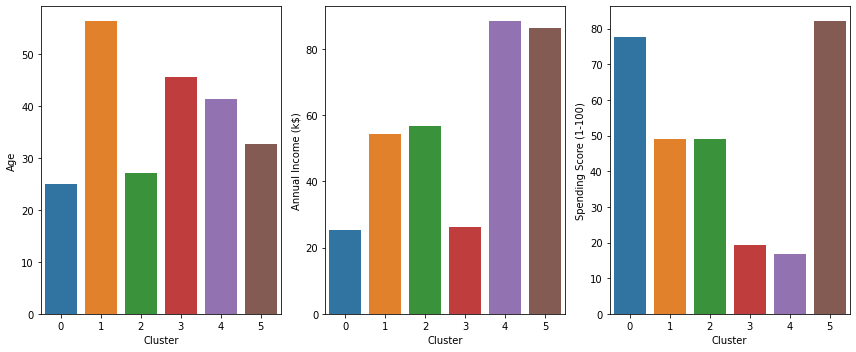

In [19]:
plt.figure(figsize = (12,5))
for i in enumerate(features):
    plt.subplot(1, 3, i[0]+1) # (rows, columns, index figure)
    sns.barplot(x = 'Cluster', y = i[1], data = average, ci = None)
    plt.tight_layout();

In [20]:
# gender deep dive 

grouping = pd.DataFrame(mall.groupby(['Cluster', 'Gender']).Gender.count())
grouping

Gender
Cluster Gender        
0       Female      13
        Male        10
1       Female      26
        Male        19
2       Female      25
        Male        13
3       Female      13
        Male         8
4       Female      14
        Male        20
5       Female      21
        Male        18

## Interpretasi 
**Cluster 0** 
- Age: 25 tahun | Annual Income: 25000 | Spending Score: 77 | Dominated by Female
- Wanita muda dengan income sedikit tapi mereka boros 

**Cluster 1**
- Age: 56 tahun | Annual Income: 54000 | Spending Score: 49 | Dominated by Female
- Wanita berumur dengan income sedang tapi mereka tidak terlalu boros 

**Cluster 2**
- Age: 27 tahun | Annual Income: 56000 | Spending Score: 49 | Dominated by Female
- Wanita muda dengan income lumayan tapi mereka tidak terlalu boros

**Cluster 3**
- Age: 45 tahun | Annual Income: 26000 | Spending Score: 19 | Dominated by Female
- Wanita berumur dengan income sedang tapi mereka sangat hemat

**Cluster 4**
- Age: 41 tahun | Annual Income: 88000 | Spending Score: 16 | Dominated by Male
- Bapak-bapak dengan highest income dan super hemat 

**Cluster 5**
- Age: 32 tahun | Annual Income: 86000 | Spending Score: 82 | Dominated by Female
- Wanita middle age berkarir dengan income tinggi dan sangat boros 

**Visualisasi Cluster**

In [21]:
from sklearn.decomposition import PCA

In [22]:
# definisikan fungsi pca

pca = PCA(n_components = 2) 

In [23]:
# bagi data menjadi feature dan target (X dan Y)

X_pca = dfmall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']].values 
Y_pca = y_kmelbow

In [24]:
principal = pca.fit_transform(X_pca)

In [25]:
print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')

Explained variance ratio from PCA: [0.4095285 0.3081674]


- first pca menjelaskan sebesar 40% varians
- second pca menjelaskan sebesar 30% varians
- sehingga 70% varians dijelaskan dengan 2 components
- visualisasi yang dibangun akan menjelaskan sebesar 70% informasi yang termuat dari data kita 

In [27]:
df_principal = pd.DataFrame(data = principal, 
                            columns = ['principal component 1', 'principal component 2'])
df_principal.head()

,principal component 1,principal component 2
0,-0.600438,-1.737179
1,-1.649886,-1.789124
2,0.315381,-1.692772
3,-1.477989,-1.781317
4,-0.060545,-1.678691


In [28]:
# menggabungkan hasil cluster dg data frame pca 

finaldf = df_principal.join(mall['Cluster'])
finaldf.head()

,principal component 1,principal component 2,Cluster
0,-0.600438,-1.737179,0
1,-1.649886,-1.789124,0
2,0.315381,-1.692772,3
3,-1.477989,-1.781317,0
4,-0.060545,-1.678691,3


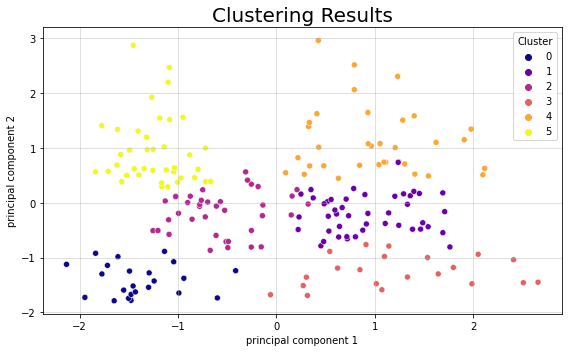

In [30]:
# starts visualizing 

plt.figure(figsize = (8,5))

plt.title('Clustering Results', size = 20)
sns.scatterplot(x = 'principal component 1', 
                y = 'principal component 2', 
                hue = 'Cluster', 
                data = finaldf, 
               palette = 'plasma')

plt.grid(alpha = 0.5)
plt.tight_layout();

## Hands-On: Customer Segmentation Hierarchical Clustering

In [32]:
import scipy.cluster.hierarchy as sch

In [33]:
dfmall.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


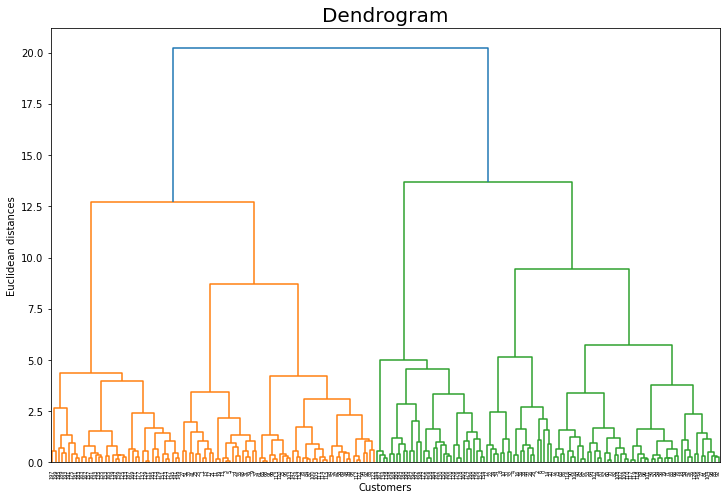

In [34]:
plt.figure(figsize = (12,8))
dendrogram = sch.dendrogram(sch.linkage(dfmall.values, method = 'ward'))

plt.title('Dendrogram', size = 20)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances');

- dari dendrogram kita tahu hierarki antar data 
- pertimbangan paling oke utk pilih klaster optimal: pilih hierarki klaster yang jaraknya tidak terlalu panjang 
- pada garis 7.5 kita tetapkan sebagai threshold / batasan 
- jumlah k paling optimal = 6 

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dfmall.values)

**Visualisasi**

In [37]:
df_hc = df.copy()

In [38]:
df_hc['Cluster'] = y_hc

In [39]:
df_hc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,5
2,Female,20,16,6,1
3,Female,23,16,77,5
4,Female,31,17,40,1


In [40]:
averaging = df_hc.groupby('Cluster', as_index = False).mean()
averaging

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,54.960000,53.620000,48.240000
1,1,43.750000,25.250000,19.050000
2,2,41.454545,89.090909,16.181818
3,3,32.692308,86.538462,82.128205
4,4,26.142857,57.228571,48.685714
5,5,25.608696,26.434783,78.521739


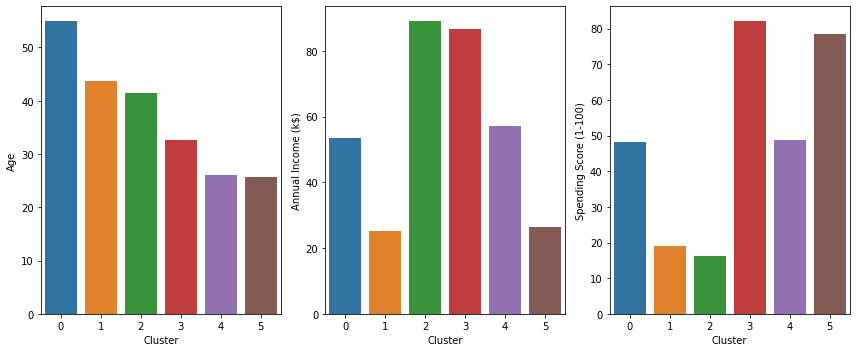

In [54]:
plt.figure(figsize = (12,5))
for i in enumerate(features):
    plt.subplot(1, 3, i[0]+1)
    sns.barplot(x = 'Cluster', y = i[1], data = averaging, ci = None)
    plt.tight_layout()

In [42]:
# gender deep dive 

grouped = pd.DataFrame(df_hc.groupby(['Cluster', 'Gender']).Gender.count())
grouped

Gender
Cluster Gender        
0       Female      25
        Male        25
1       Female      13
        Male         7
2       Female      15
        Male        18
3       Female      21
        Male        18
4       Female      25
        Male        10
5       Female      13
        Male        10

## Interpretasi 
**Cluster 0** 
- Age: 54 tahun | Annual Income: 53000 | Spending Score: 48 | Dominated by both
- Bapak-bapak dan Ibu-ibu dengan income cukup dan tidak terlalu boros

**Cluster 1**
- Age: 43 tahun | Annual Income: 25000 | Spending Score: 19 | Dominated by Female
- Wanita berumur dengan income sedang dan sangat hemat 

**Cluster 2**
- Age: 41 tahun | Annual Income: 89000 | Spending Score: 16 | Dominated by Male
- Bapak-bapak dengan highest income dan super hemat

**Cluster 3**
- Age: 32 tahun | Annual Income: 86000 | Spending Score: 82 | Dominated by Female
- Wanita berumur dengan income tinggi dan super boros

**Cluster 4**
- Age: 26 tahun | Annual Income: 57000 | Spending Score: 48 | Dominated by Female
- Wanita muda dengan income cukup dan tidak terlalu boros

**Cluster 5**
- Age: 25 tahun | Annual Income: 26000 | Spending Score: 78 | Dominated by Female
- Wanita muda dengan income sedikit tapi mereka boros 

**Visualisasi Cluster**

In [43]:
dfmall.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [44]:
pca_hc = PCA(n_components = 2)

In [46]:
# pecah antara feature & target 

X_pca_hc = dfmall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
Y_pca_hc = y_hc

In [47]:
principal_hc = pca_hc.fit_transform(X_pca_hc)

In [48]:
print(f'Explained variance ratio from PCA: {pca_hc.explained_variance_ratio_}')

Explained variance ratio from PCA: [0.4095285 0.3081674]


In [50]:
df_pca_hc = pd.DataFrame(data = principal_hc, 
                        columns = ['pc 1', 'pc 2'])
df_pca_hc.head()

,pc 1,pc 2
0,-0.600438,-1.737179
1,-1.649886,-1.789124
2,0.315381,-1.692772
3,-1.477989,-1.781317
4,-0.060545,-1.678691


In [51]:
finalhc = df_pca_hc.join(df_hc['Cluster'])
finalhc.head()

,pc 1,pc 2,Cluster
0,-0.600438,-1.737179,1
1,-1.649886,-1.789124,5
2,0.315381,-1.692772,1
3,-1.477989,-1.781317,5
4,-0.060545,-1.678691,1


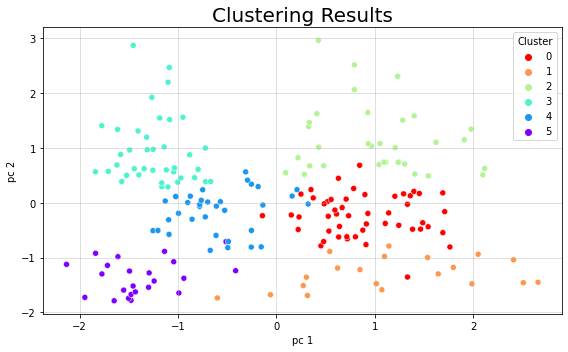

In [52]:
plt.figure(figsize = (8,5))

plt.title('Clustering Results', size = 20)
sns.scatterplot(x = 'pc 1', 
                y = 'pc 2', 
                hue = 'Cluster', 
                data = finalhc, 
               palette = 'rainbow_r')

plt.grid(alpha = 0.5)
plt.tight_layout();